In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
titanic = pd.read_csv("data/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
flights = sns.load_dataset("flights")

In [7]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [8]:
iris = sns.load_dataset("iris")

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. scatterplot - num vs num

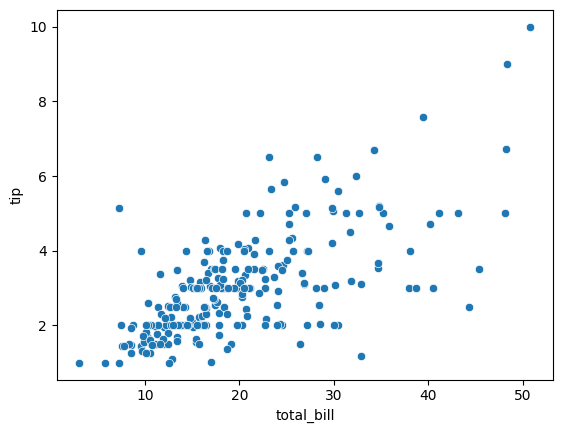

In [10]:
#bivariate
sns.scatterplot(x = tips["total_bill"], y = tips["tip"])
plt.show()

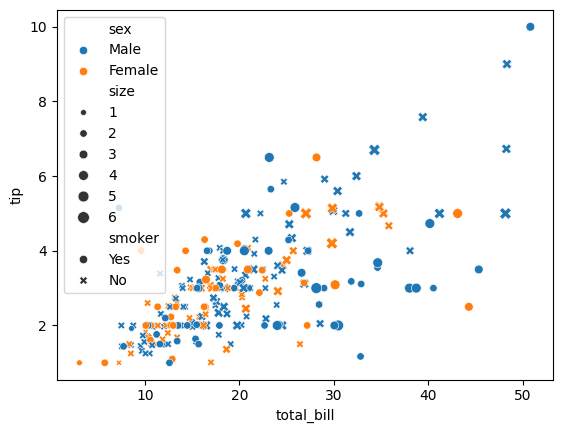

In [11]:
#multivariate
sns.scatterplot(x = tips["total_bill"], y = tips["tip"], hue = tips["sex"], style = tips["smoker"], size = tips["size"])
plt.show()

2. bar plot - cat vs num

<Axes: xlabel='Pclass', ylabel='Fare'>

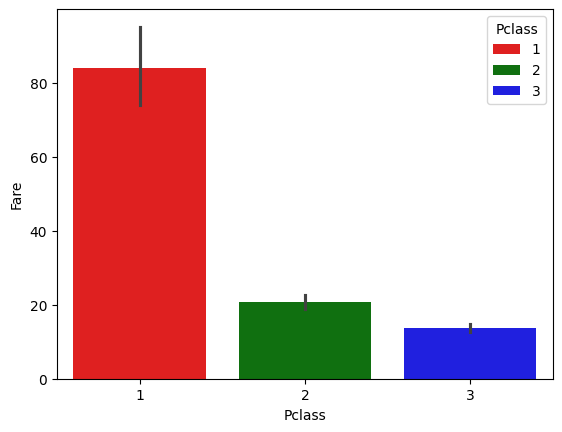

In [12]:
sns.barplot(x = titanic["Pclass"], y = titanic["Fare"], hue = titanic["Pclass"], palette = ["red", "green", "blue"])

<Axes: xlabel='Pclass', ylabel='Fare'>

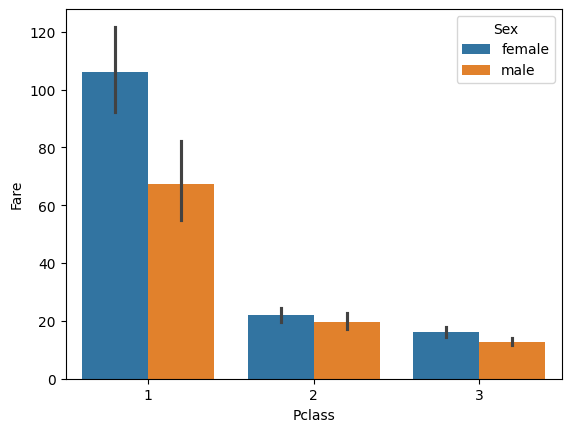

In [13]:
sns.barplot(x = titanic["Pclass"], y = titanic["Fare"], hue = titanic["Sex"])

3. boxplot - cat vs num

<Axes: xlabel='Sex', ylabel='Age'>

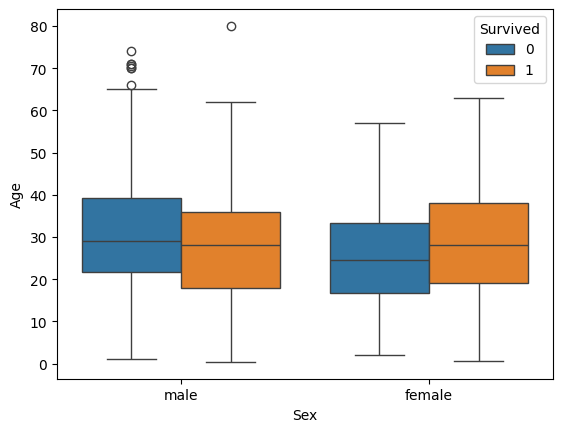

In [14]:
sns.boxplot(x = titanic["Sex"], y = titanic["Age"], hue = titanic["Survived"])

4. kde(Kernel Density Estimation) - num vs num

<Axes: xlabel='Age', ylabel='Density'>

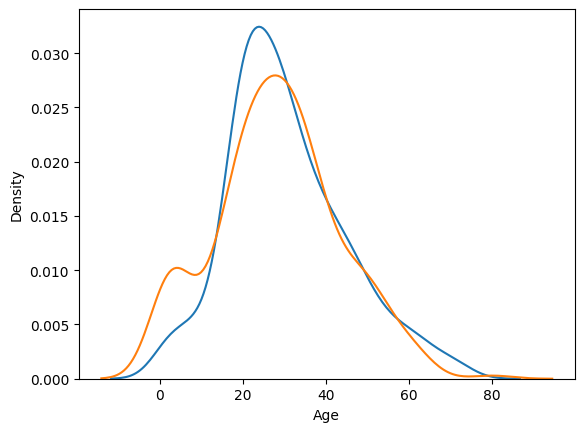

In [15]:
sns.kdeplot(titanic[titanic["Survived"] == 0]["Age"])
sns.kdeplot(titanic[titanic["Survived"] == 1]["Age"])

5. heatmap - cat vs cat

In [16]:
pd.crosstab(titanic["Pclass"], titanic["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

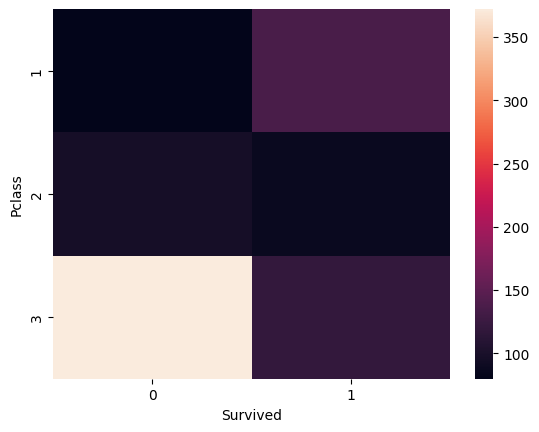

In [17]:
sns.heatmap(pd.crosstab(titanic["Pclass"], titanic["Survived"]))

In [18]:
titanic.groupby("Pclass")["Survived"].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

6. clustermap - cat vs cat

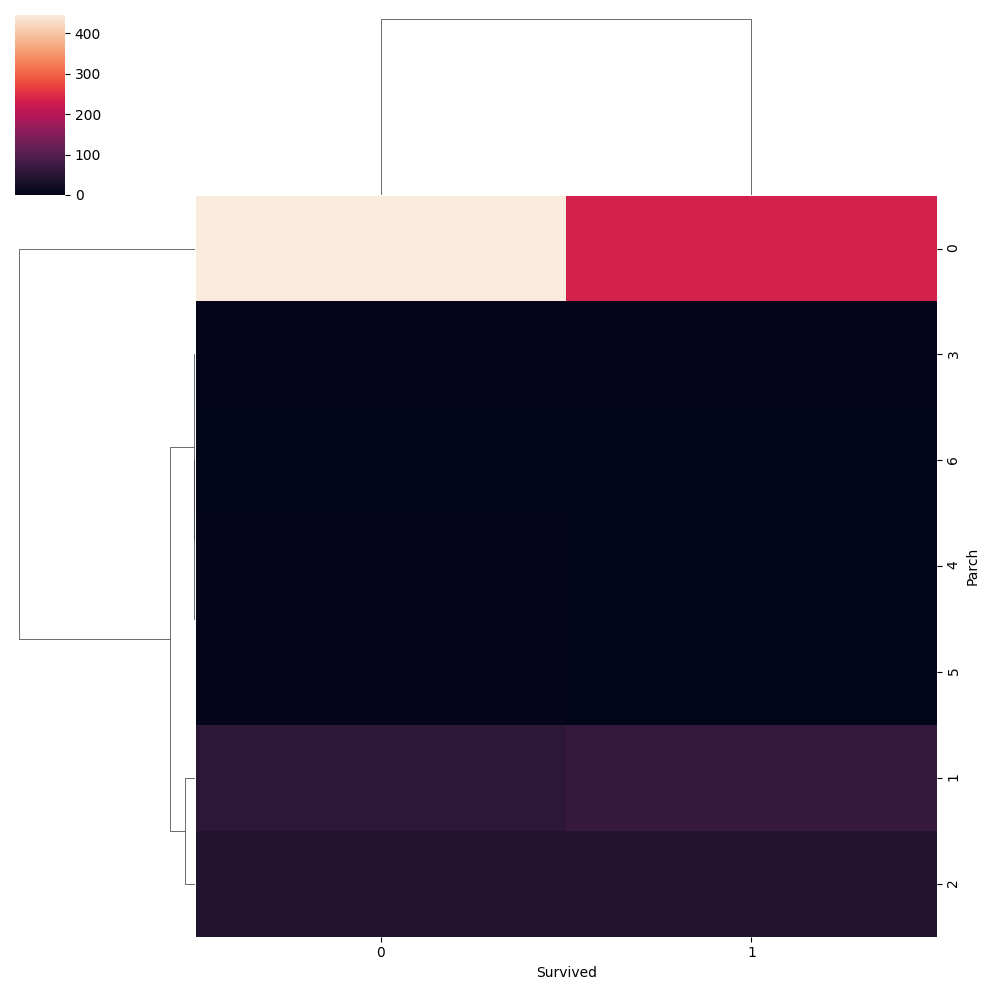

In [19]:
sns.clustermap(pd.crosstab(titanic["Parch"], titanic["Survived"]))

7. pairplot

In [20]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


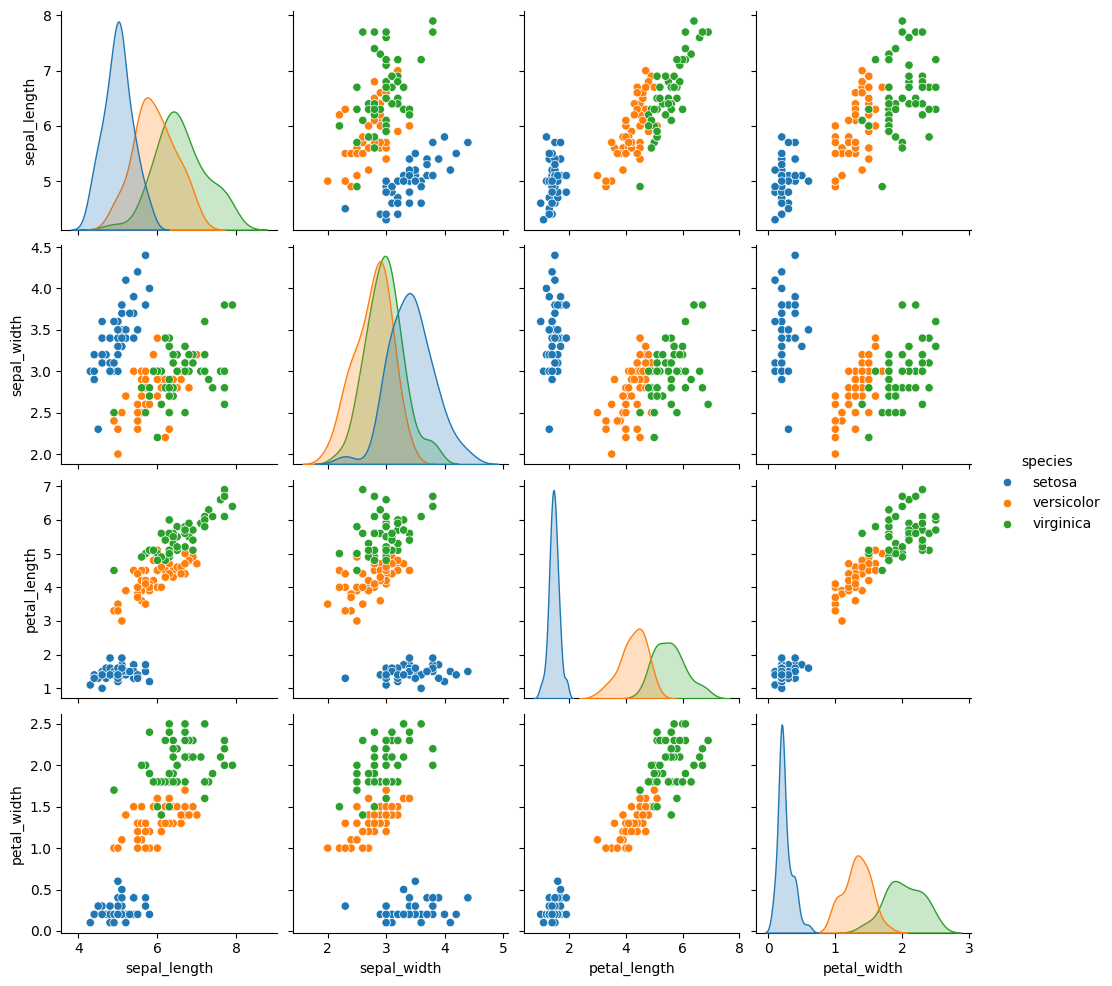

In [21]:
sns.pairplot(iris, hue = "species")

8. lineplot - num vs num

In [22]:
# use when x asix is time based quantity

In [23]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [24]:
new = flights.groupby("year")["passengers"].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

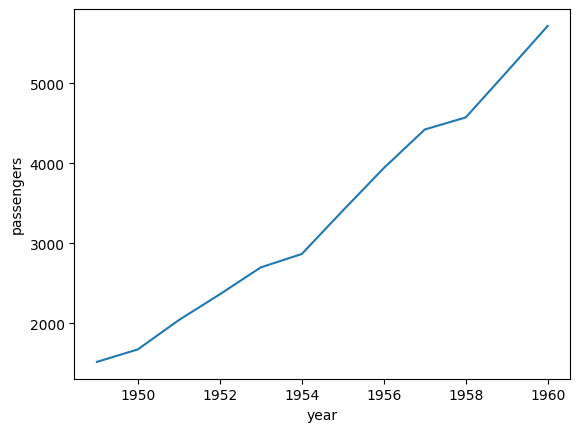

In [25]:
sns.lineplot(x = new["year"], y = new["passengers"])

In [26]:
# heatmap

In [27]:
flights.pivot_table(values='passengers', index='month', columns='year', observed=True)


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

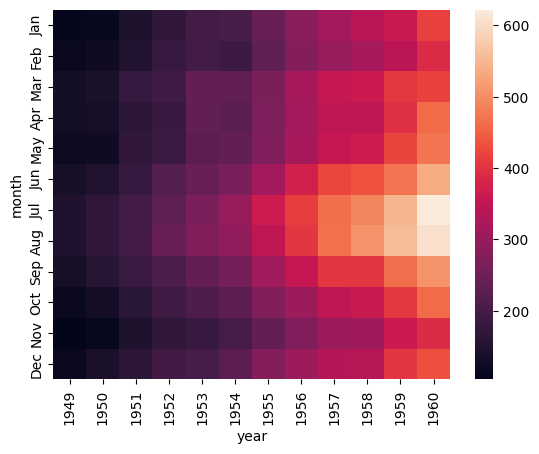

In [28]:
sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year', observed=True))